In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
filename = '../data/rfmtable.csv' 

In [6]:
import papermill as pm

In [7]:
data = pd.read_csv(filename)

In [8]:
cluster_map = {0:'Champions', 1:'Potential Loyalist', 2:'Loyal Customers', 3:'Cant Lose Them'}

In [9]:
data['cluster'] = data['cluster'].map(cluster_map)

In [10]:
data1 = data[['recency','frequency','monetary','cluster']]

In [11]:
df_melt = data1.melt(['cluster'], var_name='Metrics', value_name='measure')

# Distribution Analysis of the Customers
### Who is the golden goose?

Below, accourding to the spending behaviour of the customers, the model has seen 4 different kinds of customers in our sales.
- Champions : They Buy More Often and Spend most amount of money
- Loyal customers : They buy often but don't spend much. They could be our loyal customers if we provide discounts and stuff
- Can't Lose Them : They have a history of making big purchases and often but long time ago
- Potential Loyalist : Recent customers, spend good money and bought more than once

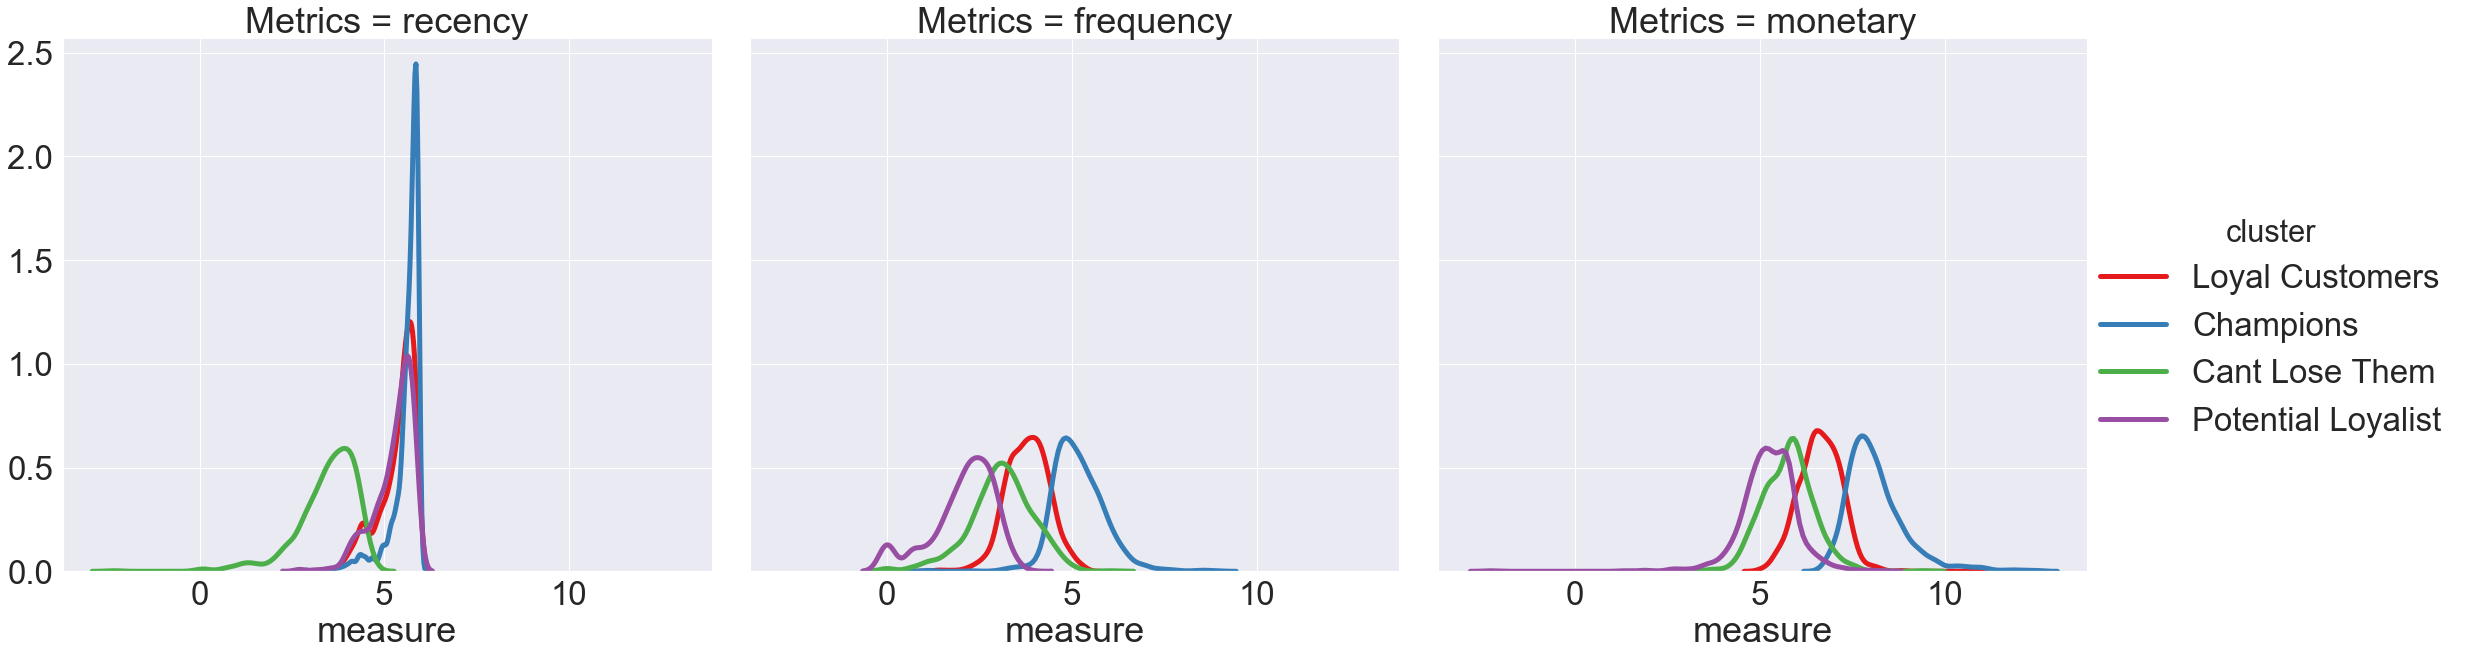

In [12]:
sns.set(font_scale=3)
g = sns.FacetGrid(df_melt, col='Metrics', hue='cluster',palette='Set1', height=10, aspect=1)
g = (g.map(sns.distplot, "measure", hist=False, label='cluster', kde_kws=dict(linewidth=5)))
g.add_legend();

# Clustering of customer

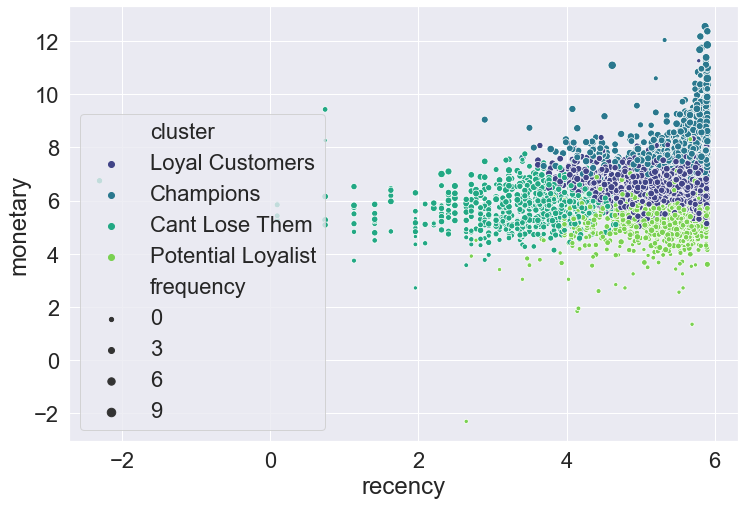

In [67]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=2)
sns.scatterplot('recency', 'monetary', size='frequency', hue='cluster', data=data, palette='viridis');